In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this, we will use the "Dogs & Cats" dataset that can be downloaded from <a href='https://www.kaggle.com/c/dogs-vs-cats/data'>Kaggle</a>.

In [1]:
#!pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

#### Seed for reproductibility

Does't seem very useful

## Setup Model Architecture

### Input 
`The shape for input should be (150, 150, 3)`

In [3]:
inputs = keras.Input(shape=(150,150,3))
inputs

<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'input_1')>

### Conv2D
`Next, create a covolutional layer (Conv2D)`
- Use 32 filters
- Kernel size should be (3, 3) (that's the size of the filter)
- Use 'relu' as activation`



In [4]:
conv2D = keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(inputs)
conv2D

<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d')>

### Pool 
`Reduce the size of the feature map with max pooling (MaxPooling2D)`
- Set the pooling size to (2, 2)


In [5]:
pool = keras.layers.MaxPooling2D(pool_size=(2,2))(conv2D)
pool

<KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d')>

### Flatten
`Turn the multi-dimensional result into vectors using a Flatten layer`

In [6]:
vector = keras.layers.Flatten()(pool)
vector

<KerasTensor: shape=(None, 175232) dtype=float32 (created by layer 'flatten')>

### Dense
`Next, add a Dense layer with 64 neurons and 'relu' activation`

In [7]:
inner = keras.layers.Dense(64, activation='relu')(vector)
inner

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense')>

### Output
`Finally, create the Dense layer with 1 neuron - this will be the output`
- The output layer should have an activation - use the appropriate activation for the binary classification case

In [8]:
outputs = keras.layers.Dense(1, activation='sigmoid')(inner) # activation='sigmoid'
outputs

<KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_1')>

### Init model

In [9]:
model = keras.Model(inputs, outputs)
model

### Optimizer & Loss
`As optimizer use SGD with the following parameters`
- SGD(lr=0.002, momentum=0.8)


In [10]:
f_opti = keras.optimizers.SGD(learning_rate=0.002, momentum=0.8)
#f_opti = keras.optimizers.Adam(learning_rate=0.01)
f_opti

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

In [11]:
f_loss = keras.losses.BinaryCrossentropy(from_logits=False)
f_loss

In [12]:
model.compile(optimizer=f_opti, loss=f_loss, metrics=['accuracy'])

***
## Question 1

Since we have a binary classification problem, what is the best loss function for us?
***

`ANSWER`: Binary Cross Entropy

***
## Question 2

What's the total number of parameters of the model? You can use the summary method for that.
***

In [13]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense (Dense)               (None, 64)                11214912  
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                             

`ANSWER`: 11,215,873

***
## Generators and Training

For the next two questions, use the following data generator for both train and validation:

`ImageDataGenerator(rescale=1./255)`

- We don't need to do any additional pre-processing for the images.
- When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?
- Use batch_size=20

In [14]:
from keras.preprocessing.image import load_img
from os import path

In [15]:
img_size=150
batch_size=20
epochs=10

### Load 1 image

### Prepare generators

In [16]:
from keras.preprocessing.image import ImageDataGenerator

Define an instance of the ImageDataGenerator that will scale the pixel values to the range of 0-1.

In [17]:
train_datagen = ImageDataGenerator(rescale=1./255) # , preprocessing_function=None
train_datagen

In [18]:
valid_datagen = ImageDataGenerator(rescale=1./255) # , preprocessing_function=None
valid_datagen

### Load `training` & `validation` images

In [19]:
base = 'data/cat_dog_NN'
train_dir = path.join('.', base, 'train')
valid_dir = path.join('.', base, 'validation')
valid_dir

'./data/cat_dog_NN/validation'

In [20]:
train_ds = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode="binary",
    # shuffle=False
)

Found 20000 images belonging to 2 classes.


In [21]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [22]:
valid_ds = valid_datagen.flow_from_directory(
    valid_dir, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode="binary",
    #shuffle=False
)

Found 5000 images belonging to 2 classes.


In [23]:
valid_ds.class_indices

{'cats': 0, 'dogs': 1}

### Fit the model

In [24]:
from tqdm.keras import TqdmCallback

In [25]:
history = model.fit(
    train_ds,
    epochs=epochs,
    steps_per_epoch=100,
    validation_data=valid_ds,
    validation_steps=50,
    callbacks=[TqdmCallback()],
    verbose=1,
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10
100/100 [==============================] - 22s 219ms/step - loss: 0.6961 - accuracy: 0.5155 - val_loss: 0.6890 - val_accuracy: 0.5580
Epoch 2/10
100/100 [==============================] - 20s 200ms/step - loss: 0.6873 - accuracy: 0.5390 - val_loss: 0.6876 - val_accuracy: 0.5630
Epoch 3/10
100/100 [==============================] - 19s 189ms/step - loss: 0.6868 - accuracy: 0.5415 - val_loss: 0.6924 - val_accuracy: 0.5100
Epoch 4/10
100/100 [==============================] - 20s 195ms/step - loss: 0.6798 - accuracy: 0.5660 - val_loss: 0.6726 - val_accuracy: 0.5850
Epoch 5/10
100/100 [==============================] - 24s 236ms/step - loss: 0.6722 - accuracy: 0.5770 - val_loss: 0.7142 - val_accuracy: 0.5220
Epoch 6/10
100/100 [==============================] - 22s 216ms/step - loss: 0.6782 - accuracy: 0.5695 - val_loss: 0.6764 - val_accuracy: 0.5820
Epoch 7/10
100/100 [==============================] - 22s 222ms/step - loss: 0.6674 - accuracy: 0.5860 - val_loss: 0.6799 - val_ac

In [26]:
def summarize_diagnostics(history):
    
    figure = plt.figure(figsize=(8,8))
            
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='val')
    plt.legend()
    
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='val')
    plt.legend()
    
    # save plot to file
    #filename = sys.argv[0].split('/')[-1]
    #plt.savefig(filename + '_plot.png')
    #plt.close()
    
    plt.tight_layout(pad=1.0)

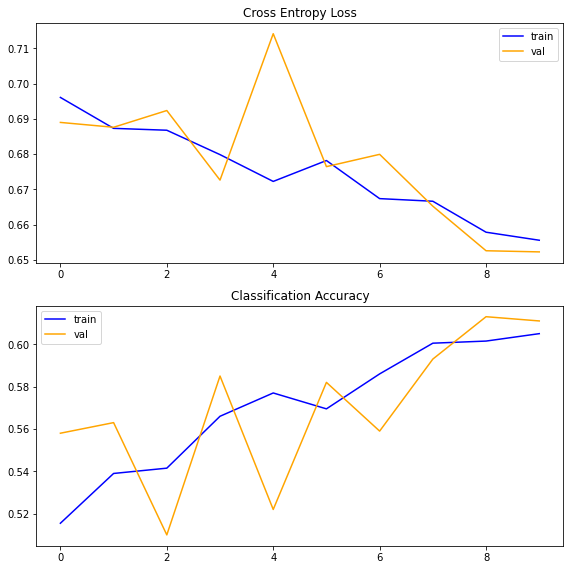

In [27]:
summarize_diagnostics(history)

In [28]:
# evaluate model
_, acc = model.evaluate(valid_ds, steps=len(valid_ds), verbose=0)
print('> %.3f' % (acc * 100.0))

> 61.780


***
## Question 3

What is the median of training accuracy for this model?
***

In [29]:
import pandas as pd

In [30]:
pd.Series(history.history['accuracy']).median()

0.573250025510788

**Results history at the end of the notebook**

`ANSWER`: 0.56

***
## Question 4

What is the standard deviation of training loss for this model?
***

In [31]:
np.array(history.history['loss']).std(ddof=0)

0.012558736511362889

In [32]:
pd.Series(history.history['loss']).std()

0.013238070636607943

**Results history at the end of the notebook**

`ANSWER`: 0.01

***
## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:
- rotation_range=40,
- width_shift_range=0.2,
- height_shift_range=0.2,
- shear_range=0.2,
- zoom_range=0.2,
- horizontal_flip=True,
- fill_mode='nearest'
***

In [33]:
data_gen_augmented = ImageDataGenerator(
    rescale=1./255,
    # preprocessing_function=None, 
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
data_gen_augmented

In [34]:
train_ds_augmented = data_gen_augmented.flow_from_directory(
    train_dir, 
    target_size=(img_size, img_size), 
    batch_size=batch_size,
    class_mode="binary",
    # shuffle=False
)

Found 20000 images belonging to 2 classes.


In [35]:
train_ds_augmented.class_indices

{'cats': 0, 'dogs': 1}

***
## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for the model trained with augmentations?
***

In [36]:
history = model.fit(
    train_ds_augmented,
    epochs=epochs,
    steps_per_epoch=100,
    validation_data=valid_ds,
    validation_steps=50,
    callbacks=[TqdmCallback()],
    verbose=1,
)

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

Epoch 1/10
100/100 [==============================] - 30s 302ms/step - loss: 0.6681 - accuracy: 0.5975 - val_loss: 0.6547 - val_accuracy: 0.6110
Epoch 2/10
100/100 [==============================] - 29s 294ms/step - loss: 0.6726 - accuracy: 0.5695 - val_loss: 0.6400 - val_accuracy: 0.6320
Epoch 3/10
100/100 [==============================] - 30s 296ms/step - loss: 0.6654 - accuracy: 0.5895 - val_loss: 0.6393 - val_accuracy: 0.6420
Epoch 4/10
100/100 [==============================] - 30s 298ms/step - loss: 0.6651 - accuracy: 0.5855 - val_loss: 0.6435 - val_accuracy: 0.6110
Epoch 5/10
100/100 [==============================] - 30s 296ms/step - loss: 0.6623 - accuracy: 0.5830 - val_loss: 0.6408 - val_accuracy: 0.6390
Epoch 6/10
100/100 [==============================] - 30s 299ms/step - loss: 0.6658 - accuracy: 0.5875 - val_loss: 0.6439 - val_accuracy: 0.6360
Epoch 7/10
100/100 [==============================] - 30s 304ms/step - loss: 0.6552 - accuracy: 0.6185 - val_loss: 0.6623 - val_ac

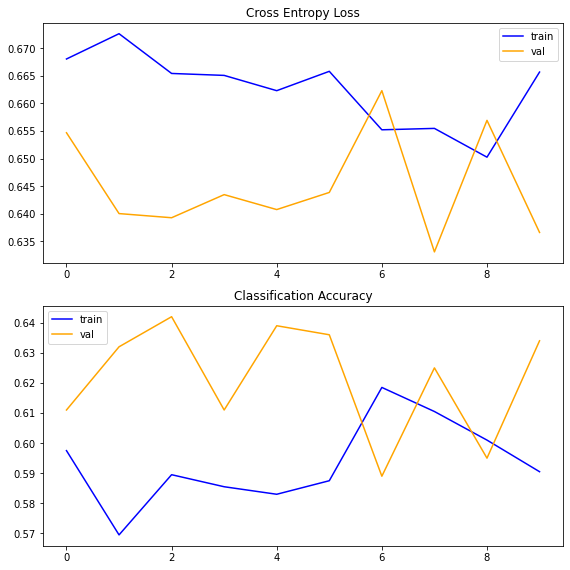

In [37]:
summarize_diagnostics(history)

In [38]:
# evaluate model
_, acc = model.evaluate(valid_ds, steps=len(valid_ds), verbose=0)
print('> %.3f' % (acc * 100.0))

> 62.520


In [39]:
pd.Series(history.history['val_loss']).mean()

0.6451016187667846

**Results history at the end of the notebook**

`ANSWER`: 0.67

***
## Question 6

What is the standard deviation of validation accuracy for the model trained with augmentations?
***

In [40]:
pd.Series(history.history['val_accuracy']).std()

0.018839674733316186

## Question 6 (V2)

What's the average of validation accuracy for the last 5 epochs (from 5 to 10) for the model trained with augmentations?

In [41]:
pd.Series(history.history['val_accuracy'][-5:]).mean()

0.6157999992370605

**Results history at the end of the notebook**

`ANSWER`: 0.65

# Results' comparisons

In [42]:
Q3 = np.array([
    0.5099999904632568, #(from_logits=True & activation=None & batch_size=32)
    0.5079687535762787, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5167187452316284, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5424999892711639, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.4920312464237213, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.4968749880790710, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.528124988079071,  #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5049999952316284, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.4847500026226043, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5637499988079071, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.4892500042915344, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5252500176429749, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5037499964237213, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5332500040531158, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5029999911785126, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5127499997615814, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5197499990463257, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5220000147819519, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.4759999960660934, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.6122500002384186, # refactor
    0.5634999871253967, # refactor
    0.5380000174045563, # refactor
    0.5607500076293945, # refactor
    0.5364999771118164, # refactor
    0.5767499804496765, # refactor
    0.6050000190734863, # new
    0.5814999938011169, # new
    0.6154999732971191, # new
    0.5387499928474426, # new
    0.5724999904632568, # new
    0.5347499847412109, # new
    0.5797500014305115, # new
    0.5622500181198120, # new
    0.5724999904632568, # new
])
Q3[-10:].mean(), Q3.max()-Q3.min()

(0.5739249944686889, 0.13949997723102575)

In [43]:
Q4 = np.array([
    0.01770461249596647, #(from_logits=True & activation=None & batch_size=32)
    0.02163280253055086, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.00671274811618648, #(from_logits=False & activation='sigmoid' & batch_size=32) !
    0.02022200281446467, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.01097479938158576, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.00405094188794689, #(from_logits=False & activation='sigmoid' & batch_size=32) !
    0.02018709408811227, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.00916966043551551, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01163930784486423, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01703455528339643, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01433750647812146, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01275301985720974, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.00752412130853628, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01433501203918285, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01289621850837832, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01087434749256912, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.00554904911415266, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.00679885401473510, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01150445343307369, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.01929377947277832, # refactor
    0.01241433268282446, # refactor
    0.00760665811544925, # refactor
    0.01281528066157361, # refactor
    0.00700573890004617, # refactor
    0.01308990488381797, # refactor
    0.01888934363790013, # new
    0.01927769883948944, # new
    0.02188398311033738, # new
    0.00501512211997466, # new
    0.01274842482275001, # new
    0.00573340173602137, # new
    0.01453703635901061, # new
    0.01222184032316453, # new
    0.01328801516349589, # new
])
Q4[-10:].mean(), Q4.max()-Q4.min()

(0.0136684770995962, 0.01783304122239049)

In [44]:
Q5 = np.array([
    0.719238418340683,  #(from_logits=True & activation=None)
    0.6899284362792969, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.7183369338512421, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.7208340525627136, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.6942334115505219, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.6979979813098908, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.7356114387512207, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.6841434001922607, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.716226440668106,  #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.7970493465662003, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.6962861537933349, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.7336579084396362, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.6925844430923462, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.675023740530014,  #(from_logits=False & activation='sigmoid' & batch_size=20) 
    0.695951521396637,  #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.668485474586486,  #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.701666599512100,  #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.662897622585296,  #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.715353327989578,  #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.724351626634597,  # refactor
    0.721460533142089,  # refactor
    0.696551239490509,  # refactor
    0.675483459234237,  # refactor
    0.733630776405334,  # refactor
    0.680016809701919, # new
    0.685623812675476, # new
    0.668934494256973, # new
    0.673723840713501, # new
    0.688292735815048, # new
    0.677138632535934, # new
    0.686079287528991, # new
    0.682400405406951, # new
    0.682352471351623, # new
    0.674121439456939, # new
])
Q5[-10:].mean(), Q5.max()-Q5.min()

(0.6798683929443354, 0.13415172398090425)

In [45]:
Q6 = np.array([
    0.0180913280411857, #(from_logits=True & activation=None & batch_size=32)       !
    0.3564355199573978, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3062359688388245, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3475699082481783, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3880283136295986, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.4312848003363450, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.3580108473331330, #(from_logits=False & activation='sigmoid' & batch_size=32)
    0.5047106561702475, #(from_logits=False & activation='sigmoid' & batch_size=20) !
    0.2000251436315092, #(from_logits=False & activation='sigmoid' & batch_size=20) !
    0.4741418520955114, #(from_logits=False & activation='sigmoid' & batch_size=20) !
    0.3746727265799448, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.3993567015502656, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.3858428112319295, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.3606789338880127, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.2112468030815043, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.3780625451000933, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.4817031009921554, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.4034426891679504, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.0000000000000000, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.3557914503873234, # refactor
    0.1711963135617919, # refactor
    0.2004034745479748, # refactor
    0.3413764536282804, # refactor
    0.3133996382368099, # refactor
    0.2557873289444785, # refactor
    0.3601782880116140, # new
    0.0415044850684757, # new
    0.0495266574413906, # new
    0.0390611948336136, # new
    0.0260693531789043, # new
    0.0493649652578890, # new
    0.0228971210565423, # new
    0.0479008236217231, # new
    0.0370998715978600, # new
    0.0246269956052351, # new
])
Q6[-10:].mean(), Q6.max()-Q6.min()

(0.06982297556732478, 0.5047106561702475)

In [46]:
Q6V2 = np.array([
    0.5859999917447567, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5852000057697296, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.3723999988287687, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.4557999968528747, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.5610000073909760, #(from_logits=False & activation='sigmoid' & batch_size=20)
    0.3199999943375587, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.7619999945163727, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.7358000010251999, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.9872000098228455, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.0000000000000000, #(from_logits=False & activation='sigmoid' & batch_size=20 & New Valid)
    0.2262000024318695, # refactor
    0.4326000034809112, # refactor
    0.4139999955892562, # refactor
    0.5902000159025192, # refactor
    0.0057999999728053, # refactor
    0.1680000003427267, # refactor
    0.5665999941527844, # new
    0.5663999915122986, # new
    0.6129999995231629, # new
    0.6359999895095825, # new
    0.5340000033378601, # new
    0.6025999903678894, # new
    0.5594000101089478, # new
    0.6027999997138977, # new
    0.5722000002861023, # new
    0.6195999979972839, # new
])
Q6V2[-10:].mean(), Q6V2.max()-Q6V2.min()

(0.587259997650981, 0.9872000098228455)